##looking over the dataset
For a better understanding of the dataset let explore it by importing and printing the first rows of that.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('clean_nus_sms.csv', index_col=0)

In [ ]:
df.head()

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4


It can be seen how many countries are in the dataset, using the unique() method.

In [ ]:
print(df['country'].unique())

['SG' 'MY' 'India' 'Pakistan' 'United States' 'Canada' 'unknown' 'Serbia'
 'United Kingdom' 'France' 'Singapore' 'China' 'Malaysia' 'Sri Lanka'
 'Spain' 'Bangladesh' 'Philippines' 'Macedonia' 'Romania' 'Kenya'
 'Slovenia' 'New Zealand' 'Nigeria' 'Ghana' 'Indonesia' 'Nepal' 'Morocco'
 'USA' 'Lebanon' 'india' 'Trinidad and Tobago' 'INDIA' 'srilanka'
 'jamaica' 'Hungary' 'Australia' 'Italia' 'BARBADOS' 'Turkey' 'UK']


As some countries names are assigned in two ways(like 'USA' and 'United States') they should be changed in a unique value for each country.

In [ ]:
df = df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}})

In [ ]:
print(df['country'].unique())
#count the real number of unique countries
print(df['country'].nunique())

['Singapore' 'Malaysia' 'India' 'Pakistan' 'United States' 'Canada'
 'Unknown' 'Serbia' 'United Kingdom' 'France' 'China' 'Sri Lanka' 'Spain'
 'Bangladesh' 'Philippines' 'Macedonia' 'Romania' 'Kenya' 'Slovenia'
 'New Zealand' 'Nigeria' 'Ghana' 'Indonesia' 'Nepal' 'Morocco' 'Lebanon'
 'Trinidad and Tobago' 'Jamaica' 'Hungary' 'Australia' 'Italia' 'Barbados'
 'Turkey']
33


The following pieplot visualizes the top ten most frequent countries in the dataset.

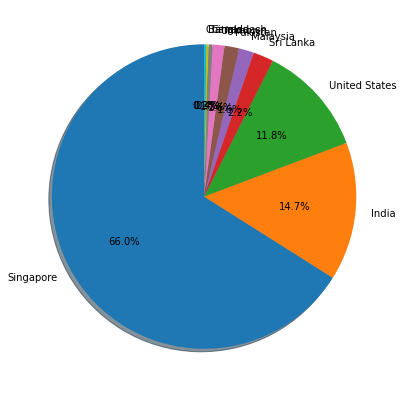

In [ ]:
#ploting top 10 countries
data_to_plot= df['country'].value_counts()[:10].to_frame()
countries = data_to_plot.index
sizes = data_to_plot.country
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=countries, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

For the rest of the experiment, I'll use these 10 countries, and the rest of them will be eliminated.

In [ ]:
df= df[df.country.isin(countries)]

## Preprocessing the test dataset 



###Setting characters to lowercase and removing punctuation

In [ ]:
# Set all characters to lower case in Message
df["Message"] = df["Message"].str.lower()
# Remove punctiation from Message variable
df["Message"] = df["Message"].str.replace('[^\w\s]','')
df['length'] = df['Message'].str.len()
df.head()

,id,Message,length,country,Date
0,10120,bugis oso near wat,18.0,Singapore,2003/4
1,10121,go until jurong point crazy available only in ...,102.0,Singapore,2003/4
2,10122,i dunno until when lets go learn pilates,40.0,Singapore,2003/4
3,10123,den only weekdays got special price haiz cant ...,127.0,Singapore,2003/4
4,10124,meet after lunch la,19.0,Singapore,2003/4


### Removing empty messages

In [ ]:
df.isnull().values.any()

True

In [ ]:
df = df.dropna()
df.isnull().values.any()

False

###Tokenizing the messages

In [ ]:
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('punkt')
df['Message'] = df.apply(lambda x: nltk.word_tokenize(x['Message']), axis=1)
df['length'] = df['Message'].str.len()
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,id,Message,length,country,Date
0,10120,"[bugis, oso, near, wat]",4,Singapore,2003/4
1,10121,"[go, until, jurong, point, crazy, available, o...",20,Singapore,2003/4
2,10122,"[i, dunno, until, when, lets, go, learn, pilates]",8,Singapore,2003/4
3,10123,"[den, only, weekdays, got, special, price, hai...",25,Singapore,2003/4
4,10124,"[meet, after, lunch, la]",4,Singapore,2003/4


### Removing stopwords

First let's explore the NLTK stop words 

In [ ]:
# Import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
print("NLTK English stop words",stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
NLTK English stop words {'a', 'how', 'after', "mustn't", 'been', 'wouldn', 'be', 'other', 'against', "weren't", 'during', 'ourselves', 'am', 'there', 'being', 'each', 'needn', 'of', 'too', "aren't", 'such', 'mustn', 'for', 'it', 'is', 'above', 'my', 'then', 'if', 'as', 'through', 'her', 'll', "doesn't", 'your', 'those', 'than', 'our', 'under', 'didn', 'off', 'ours', "you've", 'doing', 'having', 'hasn', 'or', 't', 'he', 'aren', 're', "don't", 'who', 'here', 'so', 'nor', "won't", "it's", 'these', "she's", 'between', "shan't", 'weren', 'until', 'their', 'theirs', 'did', 'again', 'she', 'all', 'some', 'haven', 'himself', "mightn't", 'shan', 'do', 'were', 'me', 'because', 'at', 'what', 'shouldn', 'over', "didn't", 's', 'they', 'ma', 'm', 'when', "you're", 'more', "hasn't", 'to', 'down', 'only', 'him', 'same', 'have', 'doesn', 'myself', 'further', 'most', 'but', 'we', 'once', 'just'

In [ ]:
example_sent = "This is a sample sentence"
word_tokens = word_tokenize(example_sent)   
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
print("Tokenized sentence",word_tokens)
print("Sentence witout stop words",filtered_sentence)

Tokenized sentence ['This', 'is', 'a', 'sample', 'sentence']
Sentence witout stop words ['This', 'sample', 'sentence']


By removing the stop words in this dataset some message lengths become too short. I will not remove them but with uncommenting the next cell, you can do so.

In [ ]:
#df['Message'] = df.apply(lambda x: [w for w in x['Message'] if not w in stop_words], axis=1)
#df['length'] = df['Message'].str.len()
#df.head()

##Preprocessing the train dataset 

The NLTK dataset of Twitter is used as training data.
First, let's take a look at these data...

In [ ]:
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [ ]:
print("First positive tweet:",positive_tweets[0])
print('There are {} positive tweets.'.format(len(positive_tweets)))
print("First negative tweet:",negative_tweets[0])
print('There are {} negative tweets.'.format(len(negative_tweets)))

First positive tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
There are 5000 positive tweets.
First negative tweet: hopeless for tmr :(
There are 5000 negative tweets.


The following word clouds show graphical representations of word frequency in positive and negative tweet sets.

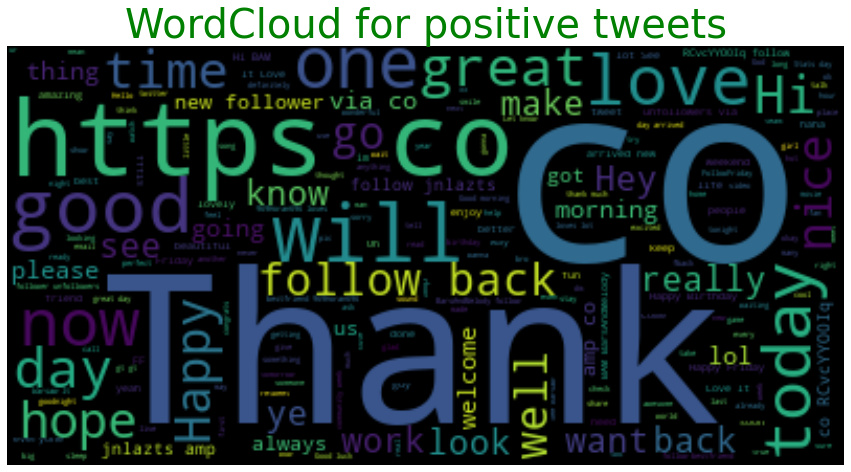

In [ ]:
from wordcloud import WordCloud
text = ' '.join(positive_tweets)
wordcloud = WordCloud().generate(text)

plt.figure(figsize = (15, 9))
plt.title("WordCloud for positive tweets",fontsize=40, color="green")
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

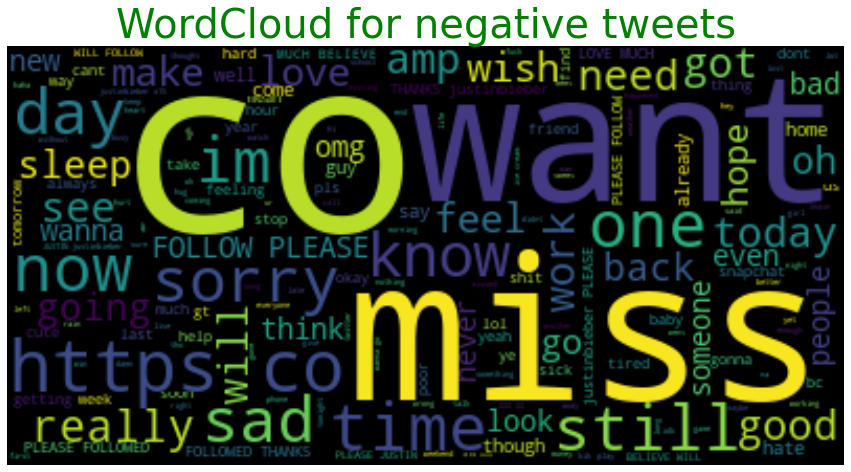

In [ ]:
text = ' '.join(negative_tweets)
wordcloud = WordCloud().generate(text)

plt.figure(figsize = (15, 9))
plt.title("WordCloud for negative tweets",fontsize=40, color="green")
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

The tokenized tweets are used for the rest of the work.

In [ ]:
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
# Show the first tokenized tweet
print("First positive tokenized tweet:",pos_tweet_tokens[0])

neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
print("First negative tokenized tweet:",neg_tweet_tokens[0])

First positive tokenized tweet: ['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
First negative tokenized tweet: ['hopeless', 'for', 'tmr', ':(']


All URLs and HTML tags should be removed.

In [ ]:
import re
# Create a function to remove url from Message data
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Create a function to remove HTML Tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [ ]:
# Define lists for preprocessed tokens
positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []

# Positive tokens
for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    positive_cleaned_tweets_list.append(cleaned_tweet)

# Negative tokens
for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    negative_cleaned_tweets_list.append(cleaned_tweet)

# Print preprocessed token lists
print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

### Creating BOW
A Bag Of Word and an array containing the top 10000 most common words based on the tweets are created in the next cells.

In [ ]:
#create a list of all the tweets
list_of_all_tweets = positive_cleaned_tweets_list + negative_cleaned_tweets_list

#turn my list of lists into a flat list of tokens
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is
len(all_tweet_tokens)

130099

In [ ]:
#create a frequency distribution of all the words.
BOW = nltk.FreqDist(token for token in all_tweet_tokens)

#inspect the result
print(BOW.most_common(10))

#select the top 10,000 words to be our features
all_words = [word for (word, freq) in BOW.most_common(10000)]
print(all_words[:10])

[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]
[':(', ':)', '!', 'I', '.', 'to', 'you', 'the', '', ',']


###Vectorizing
The next step is to change each sample to a 10000-dimensional vector of 1 and 0, which each shows if the word exists in that sample text or not.

In [ ]:
import numpy as np
def find_words(document):
    #make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    #for all words, check if that word is in the target message
    for token in all_words:
        #make a dictionary for each message 
        features[token] = +(token in document_tokens)
    return np.array(list(features.values())).astype(float)

#test it on a sample sentence
test_sentence = "coding is fun with codecademy :)".split(" ")
print(find_words(test_sentence))

[0. 1. 0. ... 0. 0. 0.]


The "The National University of Singapore SMS Corpus dataset" is used as the test, but this dataset has no label. So I'll use 0.3 portions of the Twitter dataset for checking the performance of each classifier.

In [ ]:
from sklearn.model_selection import train_test_split
positive_tw = [(tweet, "1") for tweet in positive_cleaned_tweets_list]
negative_tw = [(tweet, "0") for tweet in negative_cleaned_tweets_list]
all_labeled_tweets = positive_tw + negative_tw

feature_set = [find_words(d) for (d,c) in all_labeled_tweets]
label_set = [c for (d,c) in all_labeled_tweets]

X_train, X_val, y_train, y_val = train_test_split(feature_set, label_set, test_size=0.30, random_state=42)

## Training the classifiers

8 well-known machine learning classifiers are trained on the Twitter dataset and the accuracy of the validation set are printed in a table. Scikit-Learn library is used for this purpose.

In [ ]:
###############################################################################
#importing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

###############################################################################
ML_results = []
Perc_clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,shuffle=False).fit(X_train, y_train)
clf_score = Perc_clf.score(X_val,y_val)
ML_results.append(clf_score)


SGD_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD_clf.fit(X_train, y_train)
clf_score = SGD_clf.score(X_val,y_val)
ML_results.append(clf_score)


NC_clf = NearestCentroid()
NC_clf.fit(X_train, y_train)
clf_score = NC_clf.score(X_val,y_val)
ML_results.append(clf_score)



Tree_clf = tree.DecisionTreeClassifier()
Tree_clf.fit(X_train, y_train)
clf_score = Tree_clf.score(X_val,y_val)
ML_results.append(clf_score)


forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)
clf_score = forest.score(X_val,y_val)
ML_results.append(clf_score)


Gclf = GaussianNB()
Gclf.fit(X_train, y_train)
clf_score = Gclf.score(X_val,y_val)
ML_results.append(clf_score)


# Gaussian Naive-Bayes with isotonic calibration
clf_isotonic = CalibratedClassifierCV(Gclf, cv=2, method='isotonic')
clf_isotonic.fit(X_train, y_train)
clf_score = clf_isotonic.score(X_val,y_val)
ML_results.append(clf_score)

# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(Gclf, cv=2, method='sigmoid')
clf_sigmoid.fit(X_train, y_train)
clf_score = clf_sigmoid.score(X_val,y_val)
ML_results.append(clf_score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
from IPython import display
import pandas as pd
results =  pd.DataFrame([ML_results])
results.columns = ['Perceptron','Stochastic Gradient Descent','NearestCentroid','Decision_tree','Random_forest','Gaussian Naive-Bayes','Gaussian Naive-Bayes(isotonic)','Gaussian Naive-Bayes(sigmoid)']
results.index = ["Accuracy"]
display.display(results)

,Perceptron,Stochastic Gradient Descent,NearestCentroid,Decision_tree,Random_forest,Gaussian Naive-Bayes,Gaussian Naive-Bayes(isotonic),Gaussian Naive-Bayes(sigmoid)
Accuracy,0.999333,0.999,0.973667,0.998667,0.999667,0.720667,0.883667,0.883667


##Testing and printing the results

Now let's back to the SMS dataset... for applying the classifiers on that, the messages should be vectorized to the same 10000-dimensional vectors as what is done for the training set.

In [ ]:
df["Vectorized"] = df["Message"].apply(lambda text: find_words(text))
test_set = [Vec for Vec in df["Vectorized"]]

In [ ]:
df.head()

,id,Message,length,country,Date,Vectorized
0,10120,"[bugis, oso, near, wat]",4,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,10121,"[go, until, jurong, point, crazy, available, o...",20,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,10122,"[i, dunno, until, when, lets, go, learn, pilates]",8,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,10123,"[den, only, weekdays, got, special, price, hai...",25,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,10124,"[meet, after, lunch, la]",4,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


The predicted labels (0 for negative and 1 for positive) are generated and are saved in the data frame for each message by different ML algorithms.

In [ ]:
prediction_of_Prc = Perc_clf.predict(test_set)
df["prc"] = prediction_of_Prc.astype('int32') 
prediction_of_SGD = SGD_clf .predict(test_set)
df["SGD"] = prediction_of_SGD.astype('int32')
prediction_of_NC = NC_clf.predict(test_set)
df["NC"] = prediction_of_NC.astype('int32')
prediction_of_forest = forest.predict(test_set)
df["forest"] = prediction_of_forest.astype('int32')
df.head()

,id,Message,length,country,Date,Vectorized,prc,SGD,NC,forest
0,10120,"[bugis, oso, near, wat]",4,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1,1,1
1,10121,"[go, until, jurong, point, crazy, available, o...",20,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,1,1
2,10122,"[i, dunno, until, when, lets, go, learn, pilates]",8,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1,0,0
3,10123,"[den, only, weekdays, got, special, price, hai...",25,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1,0,0
4,10124,"[meet, after, lunch, la]",4,Singapore,2003/4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1,1,1


I used the mean of the "Nearest centroid" and "perceptron" predictions for plotting the proportion of negative and positive predicted messages.

In [ ]:
mean_of_results = 0
for algorithm in ["prc","NC"]:
  mean_of_results += df[algorithm].sum()
mean_of_results = mean_of_results/2

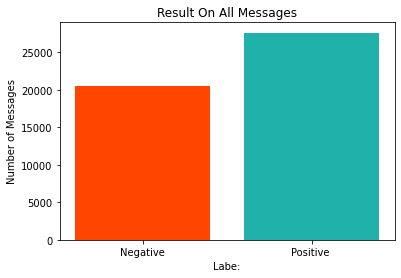

In [ ]:
label_NP = ["Negative", "Positive "]  

plt.bar(label_NP[0], len(df)-mean_of_results, color='orangered')
plt.bar(label_NP[1], mean_of_results, color='lightseagreen')
plt.xlabel('Labe:')  
plt.ylabel('Number of Messages')
plt.title("Result On All Messages")

plt.show()  

And finally, the proportion of negative and positive messages based on each country can be calculated :)

In [ ]:
df_sum = df.groupby(["country"])["prc","NC"].agg('sum')
# Mean numbers of positive messages
df_sum["Mean"] = (df_sum["prc"] + df_sum["NC"])/2
# numbers of all messages for each country
df_sum["All"] = df.groupby(["country"]).size()
print(df_sum)

                prc     NC     Mean    All
country                                   
Bangladesh       35    113     74.0    126
Canada           38    191    114.5    198
China            17    100     58.5    107
India          1530   6667   4098.5   7085
Malaysia        246    689    467.5    767
Pakistan         96    736    416.0    751
Singapore      9099  27206  18152.5  31817
Sri Lanka       125    989    557.0   1047
United States  1513   5174   3343.5   5680
Unknown          93    578    335.5    602


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


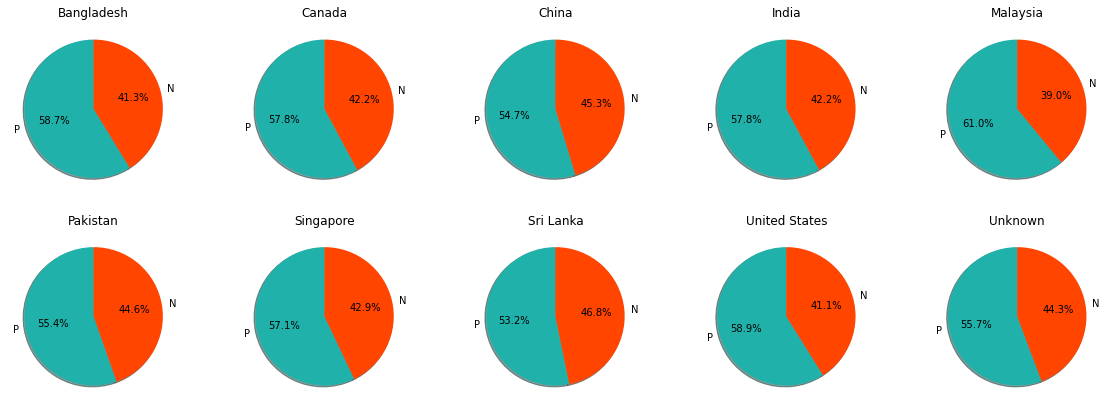

In [ ]:
label = ["P", "N"]
fig, ((ax1, ax2,ax3 , ax4 ,ax5), (ax6, ax7 ,ax8 , ax9 ,ax10)) = plt.subplots(2, 5,figsize=(20,7))
axs = [ax1, ax2, ax3, ax4,ax5,ax6, ax7 ,ax8 , ax9 ,ax10]
i = 0
for ax in axs:
  #set the title as the countries name
  ax.set_title(df_sum.index[i])
  ax.pie([df_sum["Mean"][i],df_sum["All"][i]-df_sum["Mean"][i]], labels=label, autopct='%1.1f%%',colors = ['lightseagreen','orangered'], shadow=True, startangle=90)
  i +=1

plt.show()